
# **TRABALHO 1 - CIÊNCIA DOS DADOS**
### **GABRIEL TERHORST DE SOUZA**

#### **TURMA B**





## PERGUNTA:


# **Será que o fato de um país ter um IDH baixo é condizente com um maior número de Mortes por Epidemias e menos Empregos?**


# Introdução:


### **Atráves deste trabalho, busquei entender se ter um IDH baixo estava relacionado a ter uma taxa alta de Mortes por Epidemias e menos empregabilidade de pessoas dos 15 aos 24 anos.**

### Antes de realizar minha análise eu tinha a expectativa de que países com menos IDH estavam diretamente correlacionados com ter vários casos de Mortes por Epidemia e maior % de jovens empregados (aqui estou considerando jovens como sendo pessoas da faixa de 15 à 24 anos).

### ** Para isso, acessei o site "GapMinder" ( https://www.gapminder.org/data/) para obter os dados necessários para futura análise...Baixei os arquivos e os coloquei em um mesmo dataframe, para que assim eu pudesse plota-los em um gráfico de disperção e observar suas relações.**

In [2]:
#Inicializando, importando as bibliotecas do python necessárias

import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt 

In [34]:
#Lendo os arquivos em excel 

#lendo o arquivo sobre idh
IDH = pd.read_excel('Indicator_HDI.xlsx')

#Se refere a % de pessoas de 15 à 24 anos empregadas
Empregos = pd.read_excel('indicator_t 15-24 employ.xlsx')

#Se refere ao número de mortes por Epidemia
Epidemia = pd.read_excel('indicator_epidemic killed.xlsx')

In [64]:
#Removendo os "Nan"

IDH.dropna(inplace= True)
Epidemia.dropna(inplace=True)
Empregos.dropna(inplace= True)


In [91]:
#Selecionando o ano alvo de minha análise: 2007


IDh = IDH.loc[:, ['HDI',2007]]
EpidemiA = Epidemia.loc[:, ['Epidemic killed',2007]]
EmpregoS = Empregos.loc[:, ['Total 15-24 employment to population (%)',2007]]


In [68]:
#Setando o index para cada uma das váriaveis

IDH_idx = IDh.set_index('HDI')
Empregos_idx = EmpregoS.set_index('Total 15-24 employment to population (%)')
Epidemia_idx = EpidemiA.set_index('Epidemic killed')

In [69]:
#Juntando as váriaveis (Epidemia com IDH e Empregos com IDH) e eliminando os "Nan"

juncao = Epidemia_idx.join(IDH_idx, how = 'inner', lsuffix = 'Epidemia', rsuffix = 'IDH')
juncao2 = Empregos_idx.join(IDH_idx, how = 'inner', lsuffix = 'Empregos', rsuffix = 'IDH')
juncao.dropna(inplace=True)

In [8]:
#DATAFRAME Epidemia e IDH:

juncao.head(3)

,2007Epidemia,2007IDH
Afghanistan,0,0.363
Algeria,0,0.680
Argentina,0,0.780


In [9]:
#DATAFRAME Empregos e IDH:

juncao2.head(3)

,2007Empregos,2007IDH
Afghanistan,48.0,0.363
Algeria,34.0,0.680
Argentina,39.0,0.780


In [10]:
#Junção de Empregos com o dataframe (Epidemia + IDH) e eliminação dos possíveis "Nan"

novo = juncao.join(Empregos_idx, how = 'inner')
novo.dropna(inplace=True)

# Organizando o Dataframe pelo IDH (do menor ao maior):

novo.sort_values('2007IDH').head(3)

#Vale destacar que o "2007" que consta na tabela se refere à coluna de % da população de 15 à 24 anos empregada

,2007Epidemia,2007IDH,2007
"Congo, Dem. Rep.",172,0.271,60.700001
Niger,0,0.273,51.299999
Burundi,0,0.289,72.000000


In [11]:
#Salvando em CSV e em Excel

novo.to_csv( 'relação_entre_IDH_Empregos_e_Epidemias.csv', index=True)
novo.to_excel('relação_entre_IDH_Empregos_e_Epidemias.xlsx', index=True)

### Para ter uma ideia melhor da relação países - mortes, eu resolvi utilizar o "value_counts",  para que ele me mostrassem quantos paises apresentam valores diferentes para o númer de mortes...

### A coluna da esquerda se refere ao número de mortes e a da direita a quantidade de países que tiveram essa respectiva quantidade.

In [12]:
#Analisando a relação quantidade de países por quantidade de mortes por Epidemia

# Aqui conseguimos perceber que a maior parte dos países não teve nenhum caso de morte por epidemia

novo['2007Epidemia'].value_counts()

0      70
30      2
86      1
584     1
67      1
56      1
172     1
403     1
16      1
5       1
1       1
Name: 2007Epidemia, dtype: int64

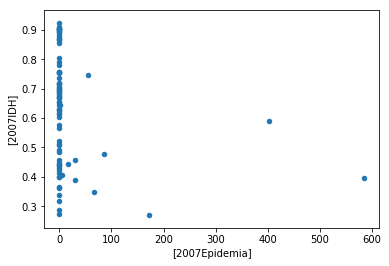

In [13]:
#Colocando o dataframe (Epidemia e IDH) em um gráfico de disperção

juncao.plot.scatter(x= ['2007Epidemia'], y = ['2007IDH'])

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.6362328775737399
Coeficiente angular: -0.00048266419549855707


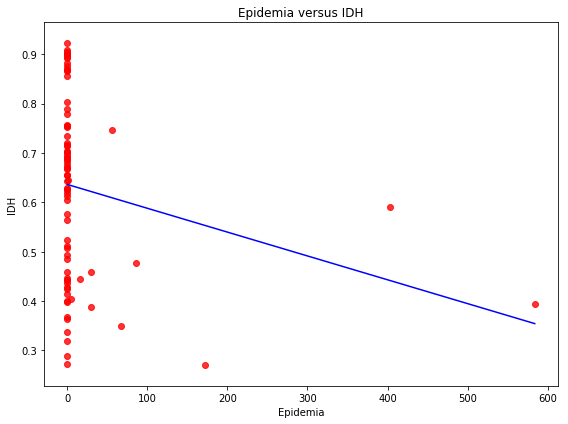

In [14]:
#Calculando a reta de tendência deste gráfico e plotando-a no mesmo

def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Epidemia versus IDH')
    plt.xlabel('Epidemia')
    plt.ylabel('IDH')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()
    

resultado = reta(novo['2007Epidemia'], novo['2007IDH'])

resultado


## Conclusões deste Primeiro Gráfico:

### Não existe relação direta entre o número de mortes por Epidemia e o IDH, logo pode-se concluir que independentemente de que país seja, uma epidemia iria ser tão letal quanto seria em qualquer outro lugar do mundo, existem apenas alguns pontos fora da curva (que são a excessão) e que puxam correlação entre esses dados pra cima... (Por coincidencia estes paises tem IDH baixo e apresentaram no ano anallisado um alto número de mortes por Epidemia).

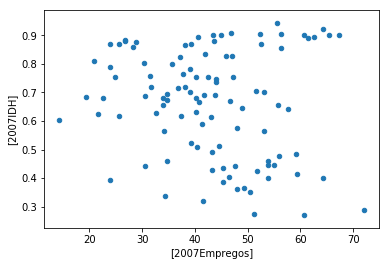

In [15]:
#Colocando o Dataframe (Empregos e IDH) em um gráfico de disperção

juncao2.plot.scatter(x= ['2007Empregos'], y = ['2007IDH'])

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.7535583723979866
Coeficiente angular: -0.0028955185035853957


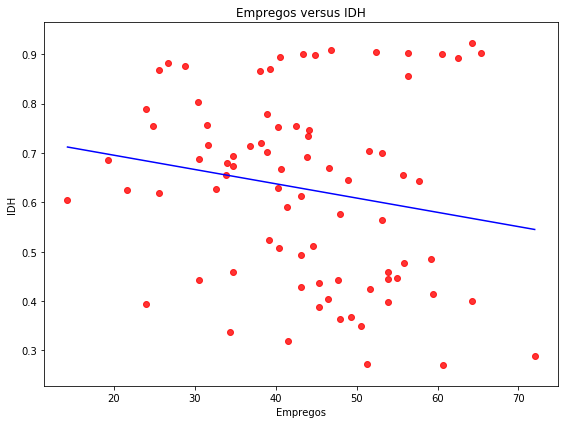

In [88]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Empregos versus IDH')
    plt.xlabel('Empregos')
    plt.ylabel('IDH')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()
    
    

    
resultado2 = reta(novo[2007],novo['2007IDH'])

resultado2

## Conclusões deste Segundo Gráfico:

### Embora não haja uma correlação explicita entre a % de pessoas de 15 à 24 anos empregadas e o IDH, ao considerarmos que o IDH leva em conta anos de estudo, podemos hipotetizar que possa existir um fenômeno nos países de maior IDH, onde os jovens ( da faixa etária citada acima) não buscam emprego antes de terminarem a Universidade, focando nos estudos, ao passo que em países de baixo IDH haveria uma maior participação de jovens na renda da familia e na procura de empregos antes, depois e durante a Universidade.

# Conclusões :

### Pela análise dos dados pude concluir que não houve relação direta entre o IDH e o número de mortes por epidemia e a porcentagem de empregos entre pessoas de 15 à 24 anos... De forma geral o IDH não é um fator que explique estes dois fenômenos, um destes fatores está na verdade diretamente correlacionado com a Economia e o outro com uma força da natureza que impactaria quaisquer países da mesma forma, independendo do nível de desenvolvimento de saúde pública. 

# ANALISANDO AGORA A EVOLUÇÃO DOS DADOS COM O PASSAR DOS ANOS:

In [92]:
#Selecionando os dados do ano de 2000

empregos = Empregos.loc[:,['Total 15-24 employment to population (%)',2000]]
idh = IDH.loc[:,['HDI',2000]]

In [93]:
#Definindo o índice

idh_idx = idh.set_index('HDI')
empregos_idx = empregos.set_index('Total 15-24 employment to population (%)')

In [94]:
#Montando dois novos dataframes, um do ano de 2000 e outro de 2007, porém somente com Empregos e IDH

dataframe2000 = empregos_idx.join(idh_idx, how = 'inner', lsuffix = 'Empregos', rsuffix = 'IDH')

dataframe2007 = Empregos_idx.join(IDH_idx, how = 'inner', lsuffix = 'Empregos', rsuffix = 'IDH')

## Aqui eu comparo as correlações entre esses dados nos dois anos observados:

In [95]:
#No ano de 2000

dataframe2000.corr()

,2000Empregos,2000IDH
2000Empregos,1.000000,-0.167834
2000IDH,-0.167834,1.000000


In [96]:
#No ano de 2007

dataframe2007.corr()

,2007Empregos,2007IDH
2007Empregos,1.000000,-0.144815
2007IDH,-0.144815,1.000000


Ajuste linear entre X3 e X4:
Coeficiente linear: 0.7434978934101161
Coeficiente angular: -0.0026605597790632166


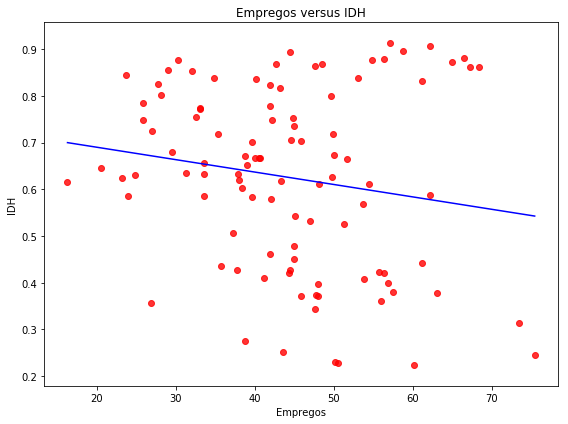

In [97]:
#Traçando a reta de correlação dos dados do ano de 2000

def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Empregos versus IDH')
    plt.xlabel('Empregos')
    plt.ylabel('IDH')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()
    
    

    
resultado3 = reta(dataframe2000['2000Empregos'],dataframe2000['2000IDH'])

resultado3

# CONCLUSÕES FINAIS:

## Atráves da ánalise comparativa entre esses dois anos, pude perceber que minha hipótese inicial sobre a possivel correlação entre ter um IDH alto e ter menos empregabilidade para pessoas entre 15 e 24 anos pode estar correta, uma vez que analisando a taxa de correlação entre esses dados, vemos que do ano de 2000 (-0,167834) até o ano de 2007(-0,144815) houve um aumento nesta correlação de 0,023019. O que me leva a crer (agora com mais embasamento) de que deve existir uma tendência em países desenvolvidos (alto IDH), onde as pessoas desta faixa etária focam mais nos estudos e postergam o ínicio de suas vidas trabalhistas.